In [1]:
import pandas as pd

In [3]:
df_raw = pd.read_csv('charge.csv')

In [4]:
df_raw.columns

Index(['CHARGE_ID', 'STATION_ID', 'CPO_SELLER_ID', 'CHARGE_DURATION_MINS',
       'CHARGE_WATT_HOUR', 'CHARGE_START_TIME_AT', 'CHARGE_STOP_TIME_AT'],
      dtype='object')

In [5]:
df_raw.describe()

,CHARGE_ID,STATION_ID,CPO_SELLER_ID,CHARGE_DURATION_MINS,CHARGE_WATT_HOUR
count,3.836200e+05,383620.000000,383620.000000,3.836200e+05,383620.000000
mean,7.799000e+07,89053.284829,23333.619780,9.959547e+02,16972.633948
std,1.517926e+06,62506.184579,18790.208657,5.857930e+04,16005.742313
min,8.270704e+06,2611.000000,8.000000,0.000000e+00,-209264.000000
25%,7.666269e+07,37290.000000,6487.000000,1.240000e+02,6162.000000
50%,7.801789e+07,72581.000000,19421.000000,3.130000e+02,10702.000000
75%,7.931275e+07,147929.000000,36995.000000,6.370000e+02,23720.000000
max,8.057388e+07,232071.000000,71833.000000,1.321030e+07,390110.000000


In [6]:
df_transform = pd.read_csv('transformed_charge_data.csv')

In [102]:
df_transform.columns

Index(['STATION_ID', 'CHARGE_ID', 'CHARGE_START_TIME_AT',
       'CHARGE_STOP_TIME_AT', 'CHARGE_WATT_HOUR',
       'charge_duration_mins_corrected', 'charge_duration_hours',
       'hourly_watt_hour_per_station_charge', 'is_stop_time_missing',
       'start_stop_same_non_zero'],
      dtype='object')

In [8]:
df_transform.describe()

,STATION_ID,CHARGE_ID,CHARGE_WATT_HOUR,charge_duration_mins_corrected,charge_duration_hours,hourly_watt_hour_per_station_charge,is_stop_time_missing,start_stop_same_non_zero
count,383619.000000,3.836190e+05,383619.000000,3.836190e+05,383619.000000,383619.000000,383619.000000,383619.000000
mean,89053.438378,7.799018e+07,16972.678191,9.714216e+02,16.190361,3790.306706,0.004442,0.001702
std,62506.193698,1.513748e+06,16005.739716,5.827572e+04,971.262060,3472.563690,0.066500,0.041223
min,2611.000000,7.529465e+07,-209264.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,37290.000000,7.666270e+07,6162.000000,1.230000e+02,2.050000,1094.430244,0.000000,0.000000
50%,72581.000000,7.801789e+07,10702.000000,3.110000e+02,5.183333,2793.196721,0.000000,0.000000
75%,147929.000000,7.931275e+07,23720.000000,6.340000e+02,10.566667,5539.801080,0.000000,0.000000
max,232071.000000,8.057388e+07,390110.000000,1.321030e+07,220171.700000,99600.000000,1.000000,1.000000


In [9]:
# Focusing on CHARGE_WATT_HOUR as it was mentioned as problematic
if 'CHARGE_WATT_HOUR' in df_transform.columns:
    print(df_transform['CHARGE_WATT_HOUR'].describe())
else:
    print("'CHARGE_WATT_HOUR' column not found in the DataFrame.")

count    383619.000000
mean      16972.678191
std       16005.739716
min     -209264.000000
25%        6162.000000
50%       10702.000000
75%       23720.000000
max      390110.000000
Name: CHARGE_WATT_HOUR, dtype: float64


In [30]:
print(hourly_consumption.head())
print(hourly_consumption.index)

                           total_hourly_consumption
timestamp                                          
2025-01-01 08:00:00+00:00             107053.495561
2025-01-01 09:00:00+00:00             147752.995726
2025-01-01 10:00:00+00:00             267560.325968
2025-01-01 11:00:00+00:00             522506.853775
2025-01-01 12:00:00+00:00             594727.249945
DatetimeIndex(['2025-01-01 08:00:00+00:00', '2025-01-01 09:00:00+00:00',
               '2025-01-01 10:00:00+00:00', '2025-01-01 11:00:00+00:00',
               '2025-01-01 12:00:00+00:00', '2025-01-01 13:00:00+00:00',
               '2025-01-01 14:00:00+00:00', '2025-01-01 15:00:00+00:00',
               '2025-01-01 16:00:00+00:00', '2025-01-01 17:00:00+00:00',
               ...
               '2025-03-24 18:00:00+00:00', '2025-03-24 19:00:00+00:00',
               '2025-03-24 20:00:00+00:00', '2025-03-24 21:00:00+00:00',
               '2025-03-24 22:00:00+00:00', '2025-03-24 23:00:00+00:00',
               '2025-03-25 00:00:

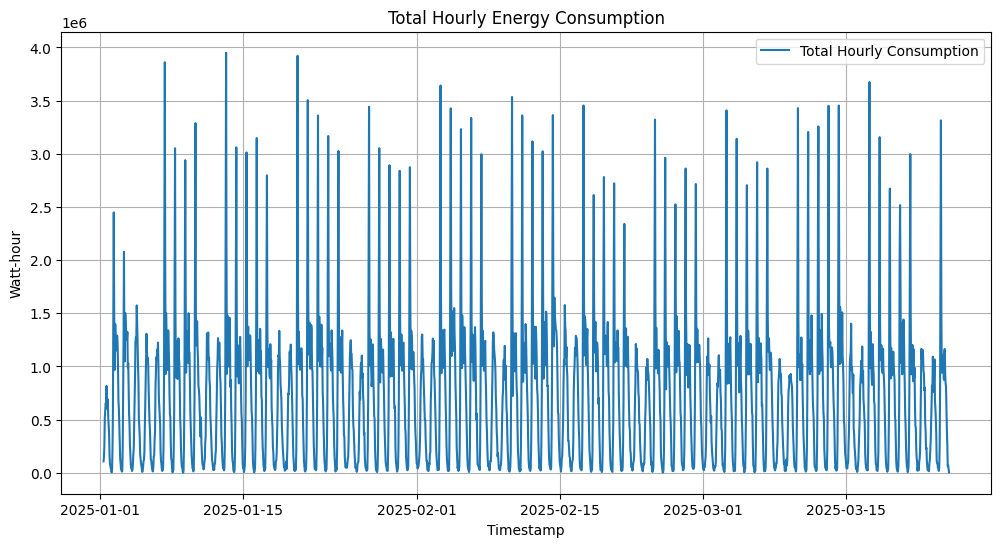

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hourly_consumption['total_hourly_consumption'], label='Total Hourly Consumption')
plt.title('Total Hourly Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

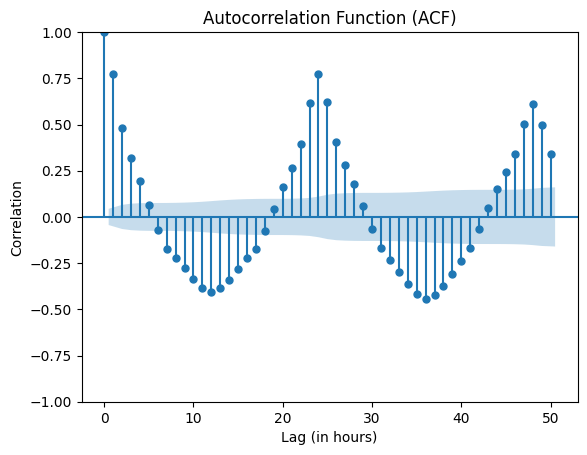

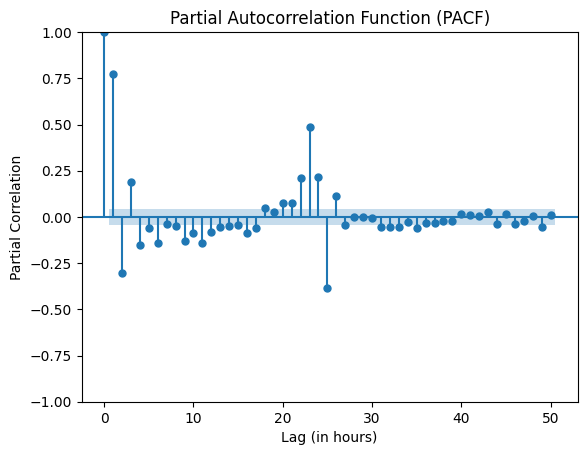

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Autocorrelation Function (ACF)
plot_acf(hourly_consumption['total_hourly_consumption'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag (in hours)')
plt.ylabel('Correlation')
plt.show()

# Partial Autocorrelation Function (PACF)
plot_pacf(hourly_consumption['total_hourly_consumption'], lags=50, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag (in hours)')
plt.ylabel('Partial Correlation')
plt.show()

Training data shape: (1820, 1)
Testing data shape: (168, 1)


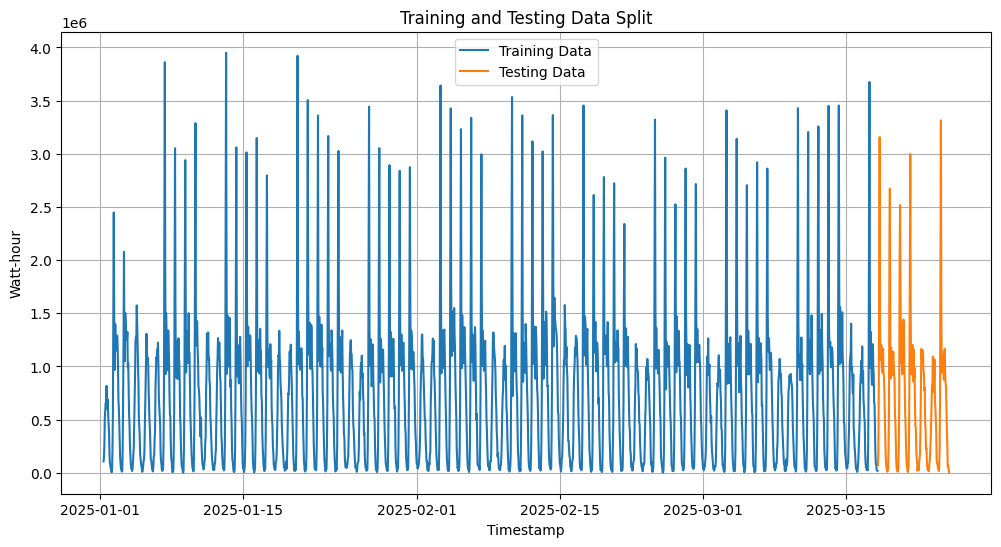

In [33]:
forecast_horizon = 168  # 7 days * 24 hours
train_data = hourly_consumption[:-forecast_horizon]
test_data = hourly_consumption[-forecast_horizon:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['total_hourly_consumption'], label='Training Data')
plt.plot(test_data['total_hourly_consumption'], label='Testing Data')
plt.title('Training and Testing Data Split')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
def create_lagged_features(df, lags):
    for lag in lags:
        df[f'lag_{lag}'] = df['total_hourly_consumption'].shift(lag)
    return df

lags = [1, 2, 3, 24, 168]

# Create lagged features for the training data and drop NaN rows
train_data_lagged = create_lagged_features(train_data.copy(), lags).dropna()
X_train = train_data_lagged.drop('total_hourly_consumption', axis=1)
y_train = train_data_lagged['total_hourly_consumption']

# Create lagged features for the test data
test_data_lagged_with_history = create_lagged_features(test_data_with_history.copy(), lags)

# The first 'max(lags)' rows of the test set will have NaN due to the shift.
# We need to drop these to align the features with the forecast period.
test_data_lagged = test_data_lagged_with_history.dropna()
X_test = test_data_lagged.drop('total_hourly_consumption', axis=1)
y_test = test_data_lagged['total_hourly_consumption']

print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing target shape:", y_test.shape)

print("\nTraining features head:")
print(X_train.head())
print("\nTesting features head:")
print(X_test.head())
print("\nTesting target head:")
print(y_test.head())

Training features shape: (1652, 5)
Training target shape: (1652,)
Testing features shape: (168, 5)
Testing target shape: (168,)

Training features head:
                                  lag_1         lag_2         lag_3  \
timestamp                                                             
2025-01-08 08:00:00+00:00  1.858094e+06  5.800234e+05  2.313127e+05   
2025-01-08 09:00:00+00:00  3.052074e+06  1.858094e+06  5.800234e+05   
2025-01-08 10:00:00+00:00  1.527652e+06  3.052074e+06  1.858094e+06   
2025-01-08 11:00:00+00:00  8.968799e+05  1.527652e+06  3.052074e+06   
2025-01-08 12:00:00+00:00  1.170037e+06  8.968799e+05  1.527652e+06   

                                 lag_24        lag_168  
timestamp                                               
2025-01-08 08:00:00+00:00  3.861002e+06  107053.495561  
2025-01-08 09:00:00+00:00  1.895435e+06  147752.995726  
2025-01-08 10:00:00+00:00  9.283737e+05  267560.325968  
2025-01-08 11:00:00+00:00  1.499318e+06  522506.853775  
2025-01


Linear Regression Results:
Mean Squared Error (MSE): 22542309958.82
Root Mean Squared Error (RMSE): 150140.97
Mean Absolute Error (MAE): 95576.83


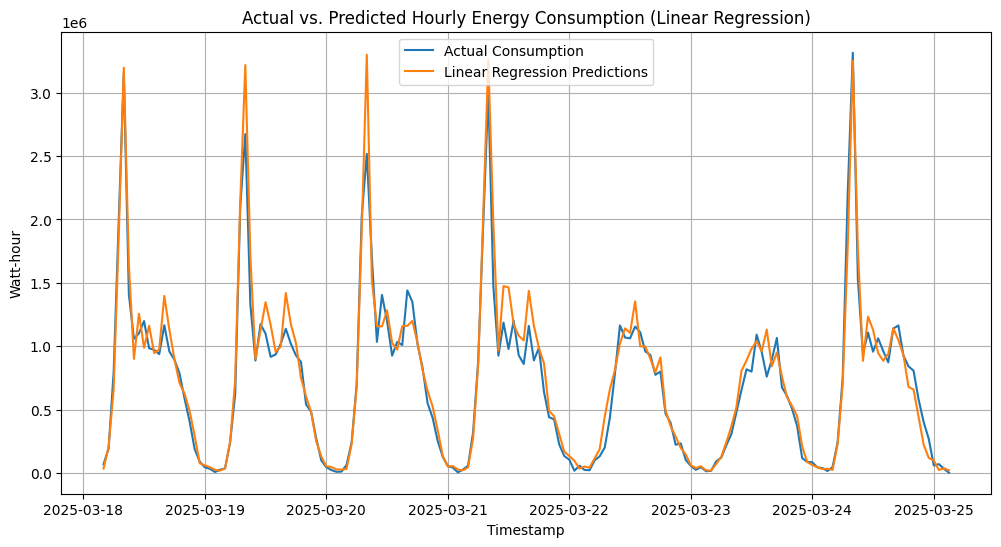


Linear Regression Predictions:
                           predicted_consumption
timestamp                                       
2025-03-18 04:00:00+00:00           3.616500e+04
2025-03-18 05:00:00+00:00           2.087713e+05
2025-03-18 06:00:00+00:00           6.630467e+05
2025-03-18 07:00:00+00:00           1.869363e+06
2025-03-18 08:00:00+00:00           3.196305e+06


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Train and Evaluate Linear Regression ---
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, predictions_lr)

print("\nLinear Regression Results:")
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.2f}')
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Consumption')
plt.plot(y_test.index, predictions_lr, label='Linear Regression Predictions')
plt.title('Actual vs. Predicted Hourly Energy Consumption (Linear Regression)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

lr_predictions_df = pd.DataFrame({'timestamp': y_test.index, 'predicted_consumption': predictions_lr})
lr_predictions_df.set_index('timestamp', inplace=True)
print("\nLinear Regression Predictions:")
print(lr_predictions_df.head())


Random Forest Regression Results:
Mean Squared Error (MSE): 17667788063.36
Root Mean Squared Error (RMSE): 132920.23
Mean Absolute Error (MAE): 80963.53


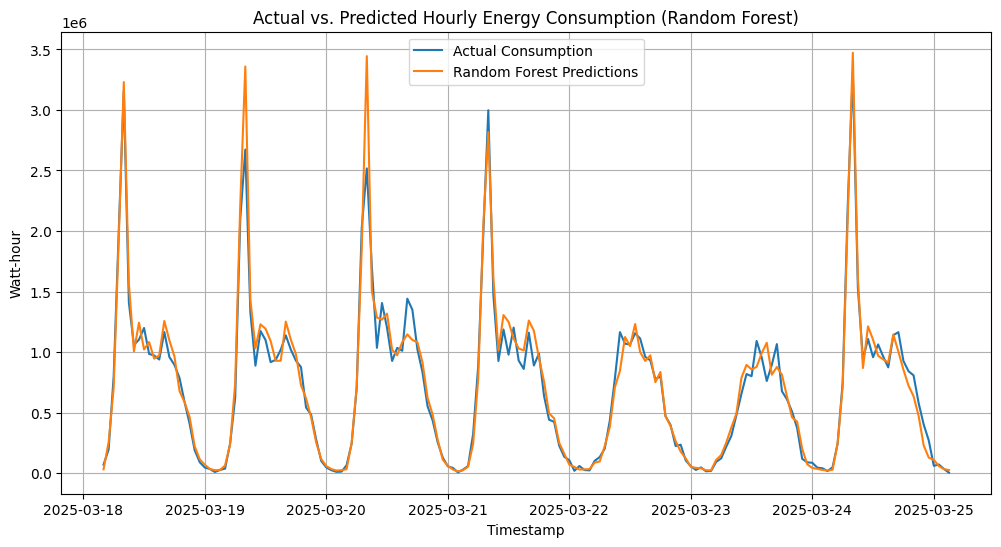


Random Forest Predictions:
                           predicted_consumption
timestamp                                       
2025-03-18 04:00:00+00:00           3.135360e+04
2025-03-18 05:00:00+00:00           2.534870e+05
2025-03-18 06:00:00+00:00           7.063261e+05
2025-03-18 07:00:00+00:00           1.936540e+06
2025-03-18 08:00:00+00:00           3.230256e+06


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Train and Evaluate Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print("\nRandom Forest Regression Results:")
print(f'Mean Squared Error (MSE): {rf_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {rf_mae:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Consumption')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions')
plt.title('Actual vs. Predicted Hourly Energy Consumption (Random Forest)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

rf_predictions_df = pd.DataFrame({'timestamp': y_test.index, 'predicted_consumption': rf_predictions})
rf_predictions_df.set_index('timestamp', inplace=True)
print("\nRandom Forest Predictions:")
print(rf_predictions_df.head())


Gradient Boosting (XGBoost) Regression Results:
Mean Squared Error (MSE): 14314237247.54
Root Mean Squared Error (RMSE): 119642.12
Mean Absolute Error (MAE): 80324.43


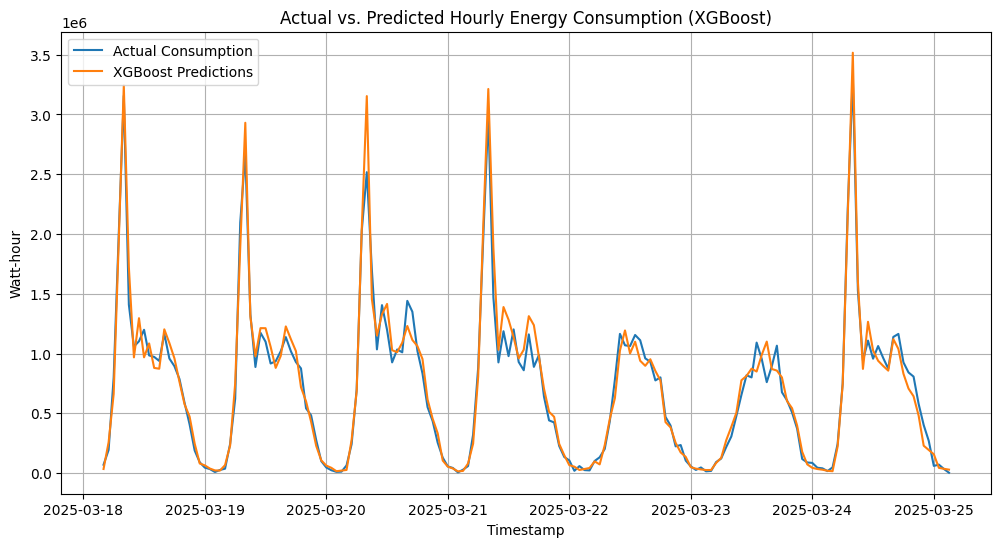


XGBoost Predictions:
                           predicted_consumption
timestamp                                       
2025-03-18 04:00:00+00:00           3.442155e+04
2025-03-18 05:00:00+00:00           2.579764e+05
2025-03-18 06:00:00+00:00           6.620486e+05
2025-03-18 07:00:00+00:00           1.935987e+06
2025-03-18 08:00:00+00:00           3.242730e+06


In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Train and Evaluate XGBoost ---
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

print("\nGradient Boosting (XGBoost) Regression Results:")
print(f'Mean Squared Error (MSE): {xgb_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {xgb_mae:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Consumption')
plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions')
plt.title('Actual vs. Predicted Hourly Energy Consumption (XGBoost)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

xgb_predictions_df = pd.DataFrame({'timestamp': y_test.index, 'predicted_consumption': xgb_predictions})
xgb_predictions_df.set_index('timestamp', inplace=True)
print("\nXGBoost Predictions:")
print(xgb_predictions_df.head())

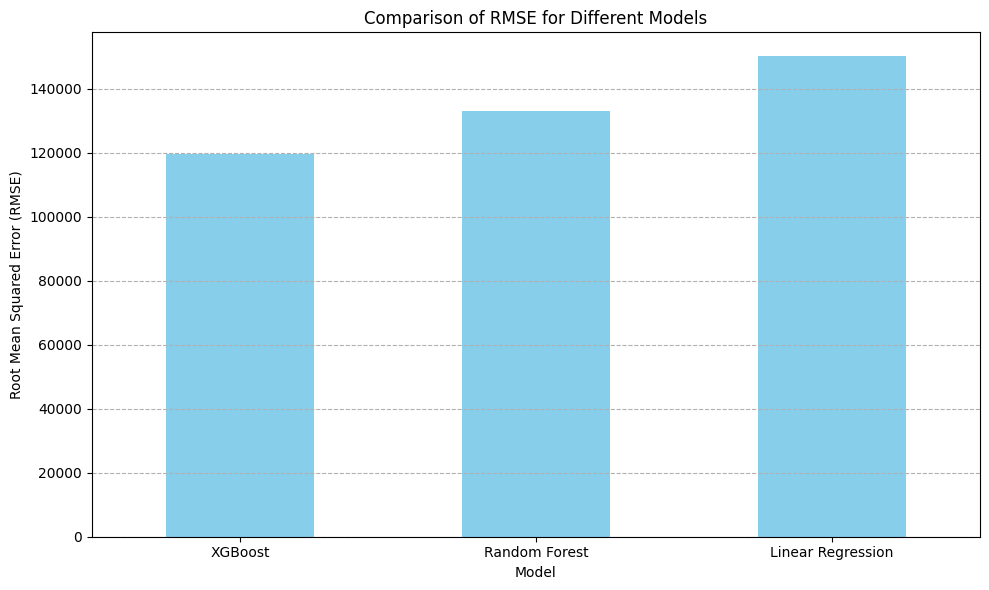

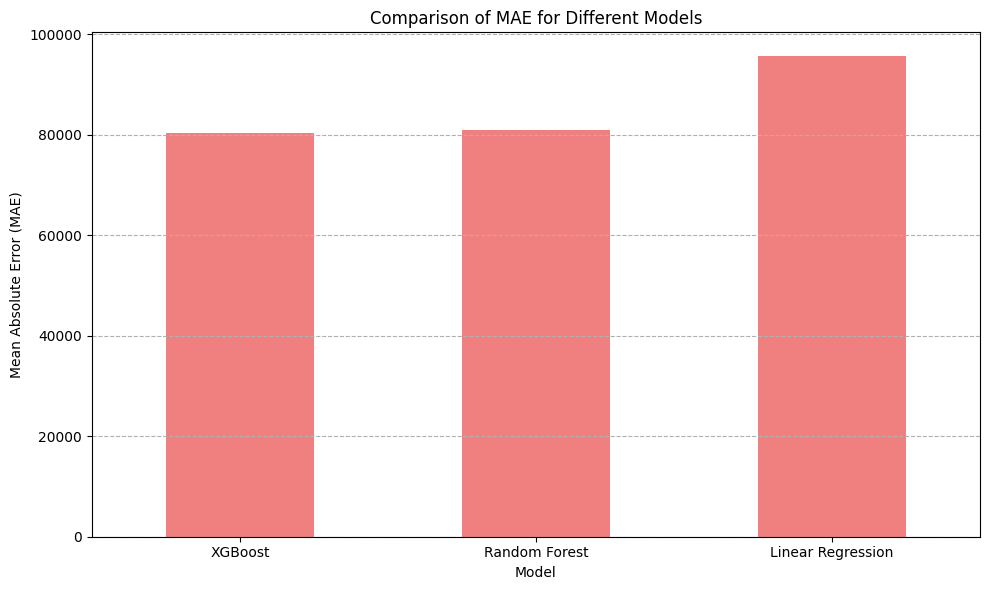


Error Statistics:
                            RMSE           MAE
Model                                         
Linear Regression  150140.966957  95576.826854
Random Forest      132920.231956  80963.531346
XGBoost            119642.121544  80324.433223


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rf_rmse, xgb_rmse],
    'MAE': [mae_lr, rf_mae, xgb_mae]
})

# Set the 'Model' column as the index for easier plotting
results_df.set_index('Model', inplace=True)

# Plotting RMSE
plt.figure(figsize=(10, 6))
results_df['RMSE'].sort_values(ascending=True).plot(kind='bar', color='skyblue')
plt.title('Comparison of RMSE for Different Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Plotting MAE
plt.figure(figsize=(10, 6))
results_df['MAE'].sort_values(ascending=True).plot(kind='bar', color='lightcoral')
plt.title('Comparison of MAE for Different Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nError Statistics:")
print(results_df)

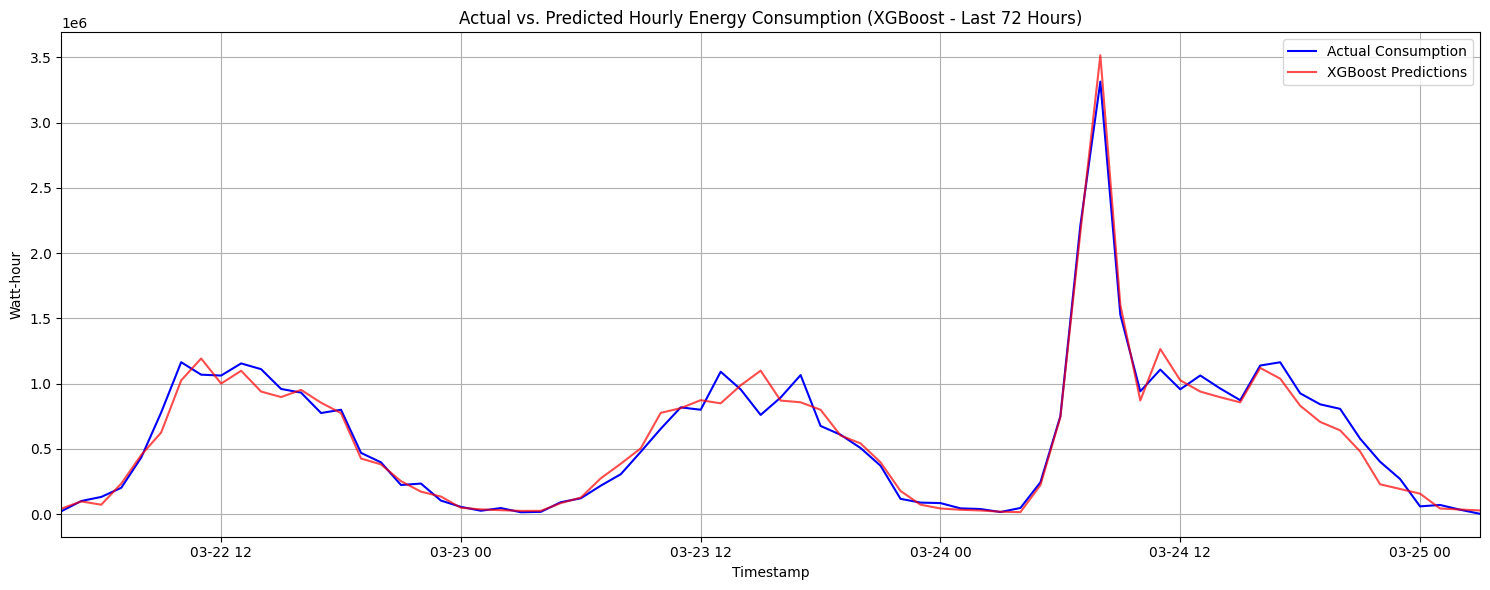


Error Statistics:
               Model           MSE           RMSE           MAE
0  Linear Regression  2.254231e+10  150140.966957  95576.826854
1      Random Forest  1.766779e+10  132920.231956  80963.531346
2            XGBoost  1.431424e+10  119642.121544  80324.433223


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Plot Actual vs. Predicted (XGBoost - Zoomed In) ---
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual Consumption', color='blue')
plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Hourly Energy Consumption (XGBoost - Last 72 Hours)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.xlim(y_test.index[-72], y_test.index[-1])  # Zoom in on the last 72 hours
plt.tight_layout()
plt.show()

# --- Error Statistics Summary ---
print("\nError Statistics:")
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, rf_mse, xgb_mse],
    'RMSE': [rmse_lr, rf_rmse, xgb_rmse],
    'MAE': [mae_lr, rf_mae, xgb_mae]
})
print(results_df)

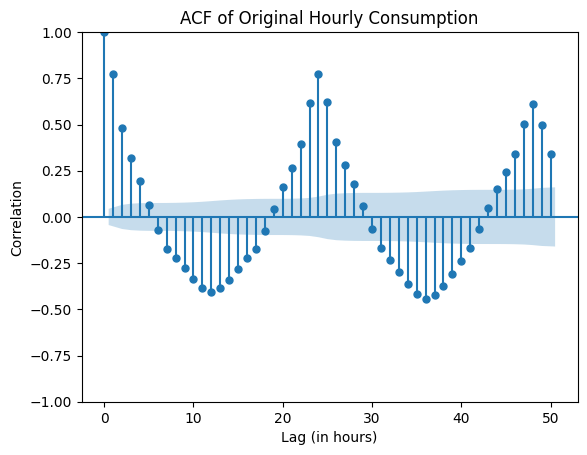

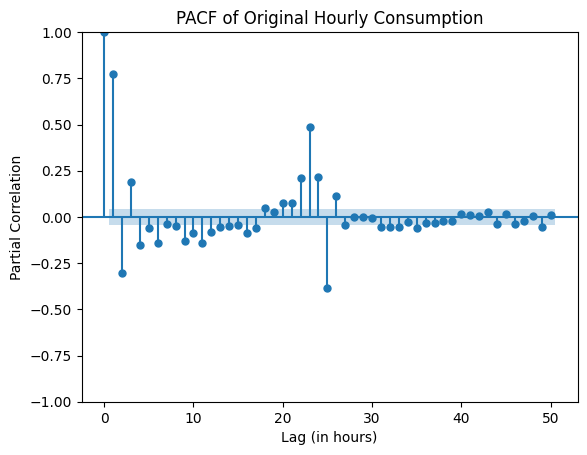

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF of the original hourly consumption
plot_acf(hourly_consumption['total_hourly_consumption'], lags=50)
plt.title('ACF of Original Hourly Consumption')
plt.xlabel('Lag (in hours)')
plt.ylabel('Correlation')
plt.show()

# PACF of the original hourly consumption
plot_pacf(hourly_consumption['total_hourly_consumption'], lags=50, method='ywm')
plt.title('PACF of Original Hourly Consumption')
plt.xlabel('Lag (in hours)')
plt.ylabel('Partial Correlation')
plt.show()

Based on these observations:

The significant spike at PACF lag 1 suggests a non-seasonal AR component, possibly of order p=1 or p=2.
The significant spikes at PACF lags around 24 suggest a seasonal AR component. We might consider an order of P=1.
The gradual decay in the ACF suggests a moving average (MA) component might be present.
The significant spikes in the ACF at seasonal lags also point towards a seasonal MA component.
Given that the Dickey-Fuller test indicated stationarity, we'll likely have d=0 and D=0.

A reasonable starting point for our SARIMA model might be something like SARIMA(1 or 2, 0, 1 or 2)(1, 0, 1)24. We can try different combinations of these orders and evaluate their performance.

Let's start by trying SARIMA(1, 0, 1)(1, 0, 1)24. We'll fit this model to our training data and then make predictions on the test set.

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)



SARIMA(1, 0, 1)(1, 0, 1)24 Results:
Mean Squared Error (MSE): 109041715291.40
Root Mean Squared Error (RMSE): 330214.65
Mean Absolute Error (MAE): 165475.97


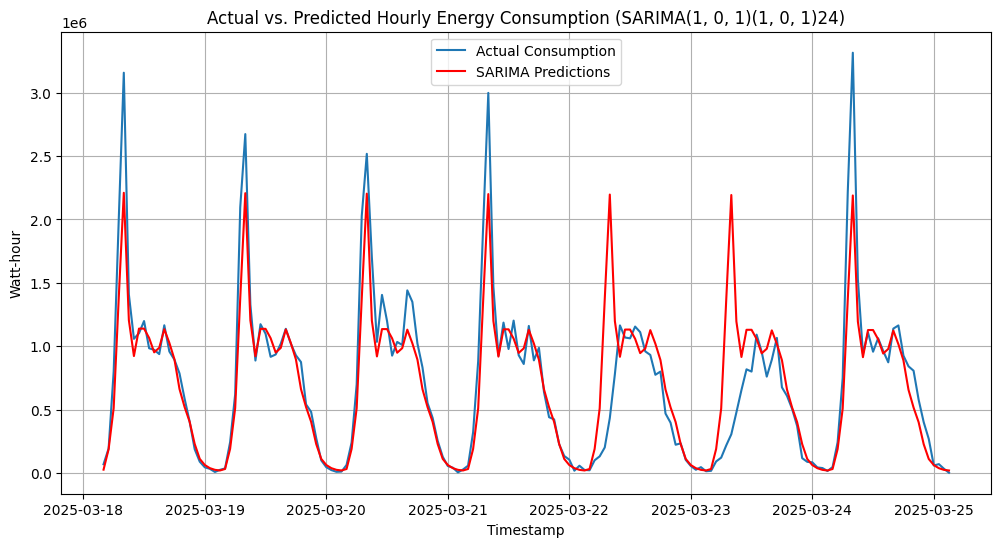


SARIMA Predictions:
                           predicted_consumption
timestamp                                       
2025-03-18 04:00:00+00:00           2.726211e+04
2025-03-18 05:00:00+00:00           1.887854e+05
2025-03-18 06:00:00+00:00           5.126725e+05
2025-03-18 07:00:00+00:00           1.380021e+06
2025-03-18 08:00:00+00:00           2.210040e+06


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fit the SARIMA model
order = (1, 0, 1)             # (p, d, q)
seasonal_order = (1, 0, 1, 24) # (P, D, Q, s)
sarima_model = SARIMAX(train_data['total_hourly_consumption'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Make predictions on the test data
sarima_predictions = sarima_fit.predict(start=len(train_data), end=len(hourly_consumption)-1)

# Evaluate the model
sarima_mse = mean_squared_error(test_data['total_hourly_consumption'], sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test_data['total_hourly_consumption'], sarima_predictions)

print("\nSARIMA(1, 0, 1)(1, 0, 1)24 Results:")
print(f'Mean Squared Error (MSE): {sarima_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {sarima_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {sarima_mae:.2f}')

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['total_hourly_consumption'], label='Actual Consumption')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions', color='red')
plt.title('Actual vs. Predicted Hourly Energy Consumption (SARIMA(1, 0, 1)(1, 0, 1)24)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

sarima_predictions_df = pd.DataFrame({'timestamp': test_data.index, 'predicted_consumption': sarima_predictions})
sarima_predictions_df.set_index('timestamp', inplace=True)
print("\nSARIMA Predictions:")
print(sarima_predictions_df.head())

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Fit the SARIMA model
order = (1, 0, 1)             # (p, d, q)
seasonal_order = (1, 0, 1, 24) # (P, D, Q, s)
sarima_model = SARIMAX(train_data['total_hourly_consumption'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Make predictions on the test data
sarima_predictions = sarima_fit.predict(start=len(train_data), end=len(hourly_consumption)-1)

# Evaluate the model
sarima_mse = mean_squared_error(test_data['total_hourly_consumption'], sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test_data['total_hourly_consumption'], sarima_predictions)

print("\nSARIMA(1, 0, 1)(1, 0, 1)24 Results:")
print(f'Mean Squared Error (MSE): {sarima_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {sarima_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {sarima_mae:.2f}')

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)



SARIMA(1, 0, 1)(1, 0, 1)24 Results:
Mean Squared Error (MSE): 109041715291.40
Root Mean Squared Error (RMSE): 330214.65
Mean Absolute Error (MAE): 165475.97


Fitting 3 folds for each of 243 candidates, totalling 729 fits

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best RMSE: 163116.89249966134

Best XGBoost Model Results on Test Set:
Mean Squared Error (MSE): 14192157419.17
Root Mean Squared Error (RMSE): 119130.84
Mean Absolute Error (MAE): 77458.54


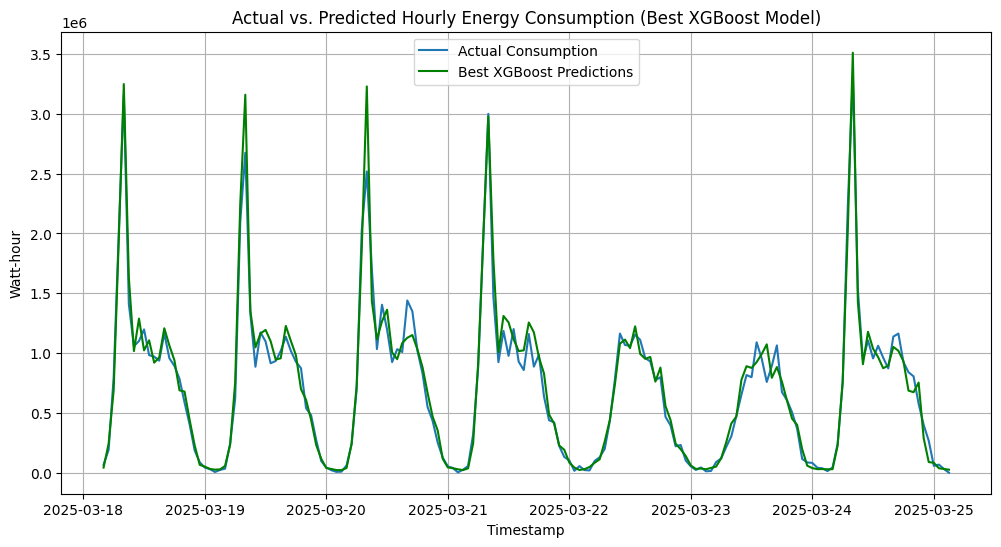


Best XGBoost Predictions:
                           predicted_consumption
timestamp                                       
2025-03-18 04:00:00+00:00           4.594425e+04
2025-03-18 05:00:00+00:00           2.452398e+05
2025-03-18 06:00:00+00:00           6.925704e+05
2025-03-18 07:00:00+00:00           1.941680e+06
2025-03-18 08:00:00+00:00           3.246718e+06


In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  # Convert negative MSE to RMSE

print("\nBest Hyperparameters:", best_params)
print("Best RMSE:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)
best_xgb_predictions = best_xgb_model.predict(X_test)

best_xgb_mse = mean_squared_error(y_test, best_xgb_predictions)
best_xgb_rmse = np.sqrt(best_xgb_mse)
best_xgb_mae = mean_absolute_error(y_test, best_xgb_predictions)

print("\nBest XGBoost Model Results on Test Set:")
print(f'Mean Squared Error (MSE): {best_xgb_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {best_xgb_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {best_xgb_mae:.2f}')

# Plot actual vs. predicted with the best XGBoost model
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Consumption')
plt.plot(y_test.index, best_xgb_predictions, label='Best XGBoost Predictions', color='green')
plt.title('Actual vs. Predicted Hourly Energy Consumption (Best XGBoost Model)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

best_xgb_predictions_df = pd.DataFrame({'timestamp': y_test.index, 'predicted_consumption': best_xgb_predictions})
best_xgb_predictions_df.set_index('timestamp', inplace=True)
print("\nBest XGBoost Predictions:")
print(best_xgb_predictions_df.head())

In [47]:
import pandas as pd
import numpy as np

def create_lstm_data(data, seq_length):
    """
    Creates sequences of data for LSTM input.

    Args:
        data (pd.Series): The time series data.
        seq_length (int): The length of the input sequences.

    Returns:
        tuple: A tuple containing:
            - X (np.array): Input sequences of shape (number_of_sequences, seq_length, 1).
            - y (np.array): Corresponding output values of shape (number_of_sequences,).
            - data_lstm (pd.DataFrame):  A DataFrame containing the original data and shifted values.
    """
    data_lstm = pd.DataFrame(data.copy())  # Create a copy
    for i in range(seq_length):
        data_lstm[f't-{i+1}'] = data_lstm['total_hourly_consumption'].shift(i + 1)

    data_lstm.dropna(inplace=True)

    # Convert to numpy array
    data_np = data_lstm['total_hourly_consumption'].values  # Only the target variable

    X = []
    y = []
    for i in range(len(data_np) - seq_length):
        X.append(data_np[i:i + seq_length])
        y.append(data_np[i + seq_length])

    X = np.array(X)
    y = np.array(y)

    # Reshape X to be (number_of_sequences, seq_length, 1)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    return X, y, data_lstm

# --- Create LSTM Data ---
seq_length = 24  # Length of the input sequence

X_lstm, y_lstm, data_lstm = create_lstm_data(hourly_consumption, seq_length)

# --- Split Data for LSTM ---
split_point_lstm = -(forecast_horizon)  # Split based on the forecast horizon
X_train_lstm = X_lstm[:split_point_lstm]
y_train_lstm = y_lstm[:split_point_lstm]
X_test_lstm = X_lstm[split_point_lstm:]
y_test_lstm = y_lstm[split_point_lstm:]

print("LSTM Training data shape X:", X_train_lstm.shape)
print("LSTM Training data shape y:", y_train_lstm.shape)
print("LSTM Testing data shape X:", X_test_lstm.shape)
print("LSTM Testing data shape y:", y_test_lstm.shape)

print("\nLSTM Training data X[0]:")
print(X_train_lstm[0])
print("\nLSTM Training data y[0]:")
print(y_train_lstm[0])
print("\nLSTM Testing data X[0]:")
print(X_test_lstm[0])
print("\nLSTM Testing data y[0]:")
print(y_test_lstm[0])

LSTM Training data shape X: (1772, 24, 1)
LSTM Training data shape y: (1772,)
LSTM Testing data shape X: (168, 24, 1)
LSTM Testing data shape y: (168,)

LSTM Training data X[0]:
[[2448270.80198271]
 [1518756.04049155]
 [ 966721.25727586]
 [1401387.49368571]
 [1389000.80764508]
 [1178625.93800749]
 [1149983.70471312]
 [1212913.47351422]
 [1289359.96950253]
 [1215365.96447182]
 [ 988434.47817185]
 [ 679185.83295967]
 [ 607700.54258504]
 [ 441012.31752059]
 [ 280628.84449618]
 [ 138922.51421658]
 [  91433.17608022]
 [  35929.58775423]
 [  22346.25042842]
 [  10962.03427264]
 [  13903.47706544]
 [ 228749.19001171]
 [ 703244.03071464]
 [1232864.25160898]]

LSTM Training data y[0]:
2077985.0317684065

LSTM Testing data X[0]:
[[  22189.26013084]
 [ 261636.3526261 ]
 [ 823814.6520752 ]
 [2110039.78669228]
 [3674462.01733104]
 [1640800.41890482]
 [ 984268.85727942]
 [1324077.19566392]
 [1135619.97699854]
 [ 930703.32123804]
 [ 826289.86053635]
 [ 959468.29363076]
 [1209135.47609439]
 [ 996088.9

2025-05-12 11:17:09.015422: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 11:17:10.067489: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 11:17:11.148529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-12 11:17:11.933708: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-12 11:17:12.145490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-12 11:17:13.881518: I tensorflow/core/platform/cpu_feature_gu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 926295982080.0000 - val_loss: 571435253760.0000
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 483422863360.0000 - val_loss: 447806013440.0000
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 412730195968.0000 - val_loss: 432169615360.0000
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 389893357568.0000 - val_loss: 398570225664.0000
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 435572867072.0000 - val_loss: 335067512832.0000
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 406427926528.0000 - val_loss: 439110926336.0000
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 413397680128.0000 - val_loss: 405306834944.0000
Epoch 8/50

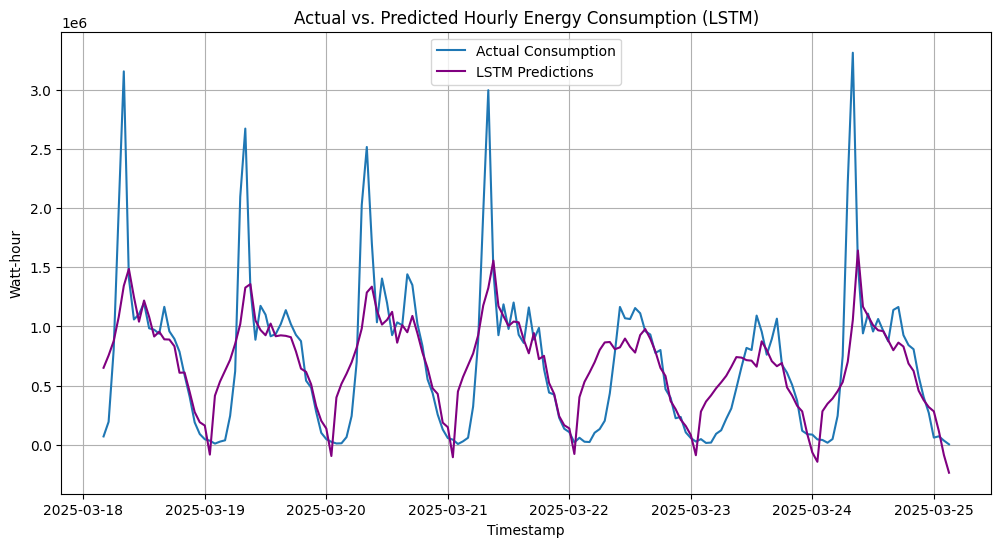


LSTM Predictions:
                           predicted_consumption
timestamp                                       
2025-03-18 04:00:00+00:00           6.503246e+05
2025-03-18 05:00:00+00:00           7.548259e+05
2025-03-18 06:00:00+00:00           8.758753e+05
2025-03-18 07:00:00+00:00           1.080553e+06
2025-03-18 08:00:00+00:00           1.343068e+06


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Print the model summary
lstm_model.summary()

# Train the LSTM model
epochs = 50
batch_size = 32
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
lstm_predictions = lstm_model.predict(X_test_lstm)

# Evaluate the predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

lstm_mse = mean_squared_error(y_test_lstm, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_lstm, lstm_predictions)

print("\nLSTM Model Results:")
print(f'Mean Squared Error (MSE): {lstm_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {lstm_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {lstm_mae:.2f}')

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(hourly_consumption.index[-len(y_test_lstm):], y_test_lstm, label='Actual Consumption')
plt.plot(hourly_consumption.index[-len(y_test_lstm):], lstm_predictions, label='LSTM Predictions', color='purple')
plt.title('Actual vs. Predicted Hourly Energy Consumption (LSTM)')
plt.xlabel('Timestamp')
plt.ylabel('Watt-hour')
plt.legend()
plt.grid(True)
plt.show()

lstm_predictions_df = pd.DataFrame({'timestamp': hourly_consumption.index[-len(y_test_lstm):], 'predicted_consumption': lstm_predictions.flatten()})
lstm_predictions_df.set_index('timestamp', inplace=True)
print("\nLSTM Predictions:")
print(lstm_predictions_df.head())

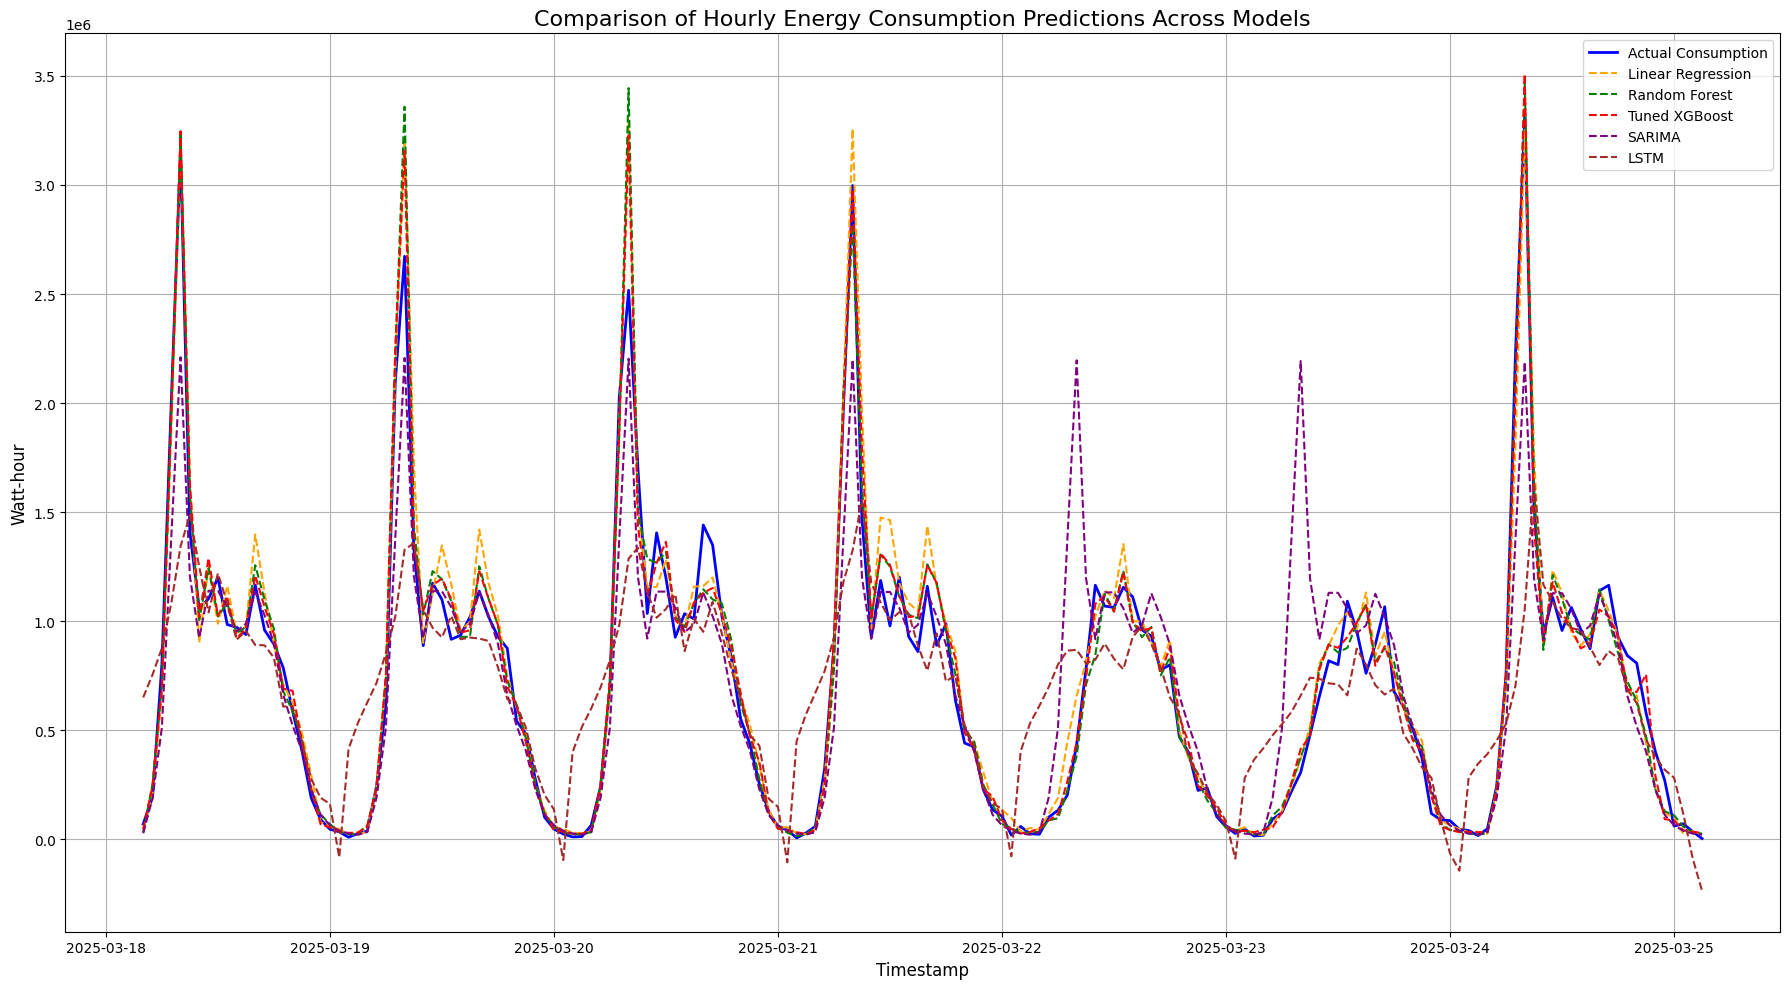

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure we have the prediction dataframes for all models
# lr_predictions_df, rf_predictions_df, best_xgb_predictions_df,
# sarima_predictions_df, lstm_predictions_df

plt.figure(figsize=(18, 10))

# Plot actual consumption
plt.plot(y_test.index, y_test.values, label='Actual Consumption', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(lr_predictions_df.index, lr_predictions_df['predicted_consumption'], label='Linear Regression', color='orange', linestyle='--')

# Plot Random Forest predictions
plt.plot(rf_predictions_df.index, rf_predictions_df['predicted_consumption'], label='Random Forest', color='green', linestyle='--')

# Plot Tuned XGBoost predictions
plt.plot(best_xgb_predictions_df.index, best_xgb_predictions_df['predicted_consumption'], label='Tuned XGBoost', color='red', linestyle='--')

# Plot SARIMA predictions
plt.plot(sarima_predictions_df.index, sarima_predictions_df['predicted_consumption'], label='SARIMA', color='purple', linestyle='--')

# Plot LSTM predictions
plt.plot(lstm_predictions_df.index, lstm_predictions_df['predicted_consumption'], label='LSTM', color='brown', linestyle='--')

plt.title('Comparison of Hourly Energy Consumption Predictions Across Models', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Watt-hour', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
import numpy as np

# --- Prepare data for future predictions (using the last known values) ---
last_known_consumption = hourly_consumption['total_hourly_consumption'].iloc[-max(lags):].values.flatten()

future_predictions_lr = []
current_history_lr = list(last_known_consumption)

future_predictions_rf = []
current_history_rf = list(last_known_consumption)

future_predictions_xgb = []
current_history_xgb = list(last_known_consumption)

n_future_hours = 168
lags_used = [1, 2, 3, 24, 168]

for i in range(n_future_hours):
    # Linear Regression
    features_lr = np.array([current_history_lr[-lag] if len(current_history_lr) >= lag else 0 for lag in lags_used]).reshape(1, -1)
    next_pred_lr = model_lr.predict(features_lr)[0]
    future_predictions_lr.append(next_pred_lr)
    current_history_lr.append(next_pred_lr)

    # Random Forest
    features_rf = np.array([current_history_rf[-lag] if len(current_history_rf) >= lag else 0 for lag in lags_used]).reshape(1, -1)
    next_pred_rf = rf_model.predict(features_rf)[0]
    future_predictions_rf.append(next_pred_rf)
    current_history_rf.append(next_pred_rf)

    # Tuned XGBoost
    features_xgb = np.array([current_history_xgb[-lag] if len(current_history_xgb) >= lag else 0 for lag in lags_used]).reshape(1, -1)
    next_pred_xgb = best_xgb_model.predict(features_xgb)[0]
    future_predictions_xgb.append(next_pred_xgb)
    current_history_xgb.append(next_pred_xgb)

# Create future timestamps
last_timestamp = hourly_consumption.index[-1]
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=n_future_hours, freq='H')

# Create DataFrames for future predictions
future_lr_df = pd.DataFrame({'timestamp': future_timestamps, 'predicted_consumption': future_predictions_lr}).set_index('timestamp')
future_rf_df = pd.DataFrame({'timestamp': future_timestamps, 'predicted_consumption': future_predictions_rf}).set_index('timestamp')
future_xgb_df = pd.DataFrame({'timestamp': future_timestamps, 'predicted_consumption': future_predictions_xgb}).set_index('timestamp')

print("\nLinear Regression Predictions for Next Week:")
print(future_lr_df.head())
print("\nRandom Forest Predictions for Next Week:")
print(future_rf_df.head())
print("\nTuned XGBoost Predictions for Next Week:")
print(future_xgb_df.head())

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with featur

In [51]:
# Forecast the next 168 hours using the fitted SARIMA model
sarima_future_predictions = sarima_fit.get_forecast(steps=n_future_hours).predicted_mean
sarima_future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=n_future_hours, freq='H')
future_sarima_df = pd.DataFrame({'timestamp': sarima_future_timestamps, 'predicted_consumption': sarima_future_predictions}).set_index('timestamp')

print("\nSARIMA Predictions for Next Week:")
print(future_sarima_df.head())


SARIMA Predictions for Next Week:
                           predicted_consumption
timestamp                                       
2025-03-25 04:00:00+00:00           2.726211e+04
2025-03-25 05:00:00+00:00           1.887854e+05
2025-03-25 06:00:00+00:00           5.126725e+05
2025-03-25 07:00:00+00:00           1.380021e+06
2025-03-25 08:00:00+00:00           2.210040e+06


In [52]:
# Prepare the last sequence from the training data
last_sequence = X_test_lstm[-1].reshape(1, seq_length, 1)
future_predictions_lstm = []

for _ in range(n_future_hours):
    next_prediction = lstm_model.predict(last_sequence)
    future_predictions_lstm.append(next_prediction[0, 0])
    # Update the sequence by shifting and appending the new prediction
    last_sequence = np.roll(last_sequence, shift=-1, axis=1)
    last_sequence[0, -1, 0] = next_prediction[0, 0]

future_lstm_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=n_future_hours, freq='H')
future_lstm_df = pd.DataFrame({'timestamp': future_lstm_timestamps, 'predicted_consumption': future_predictions_lstm}).set_index('timestamp')

print("\nLSTM Predictions for Next Week:")
print(future_lstm_df.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

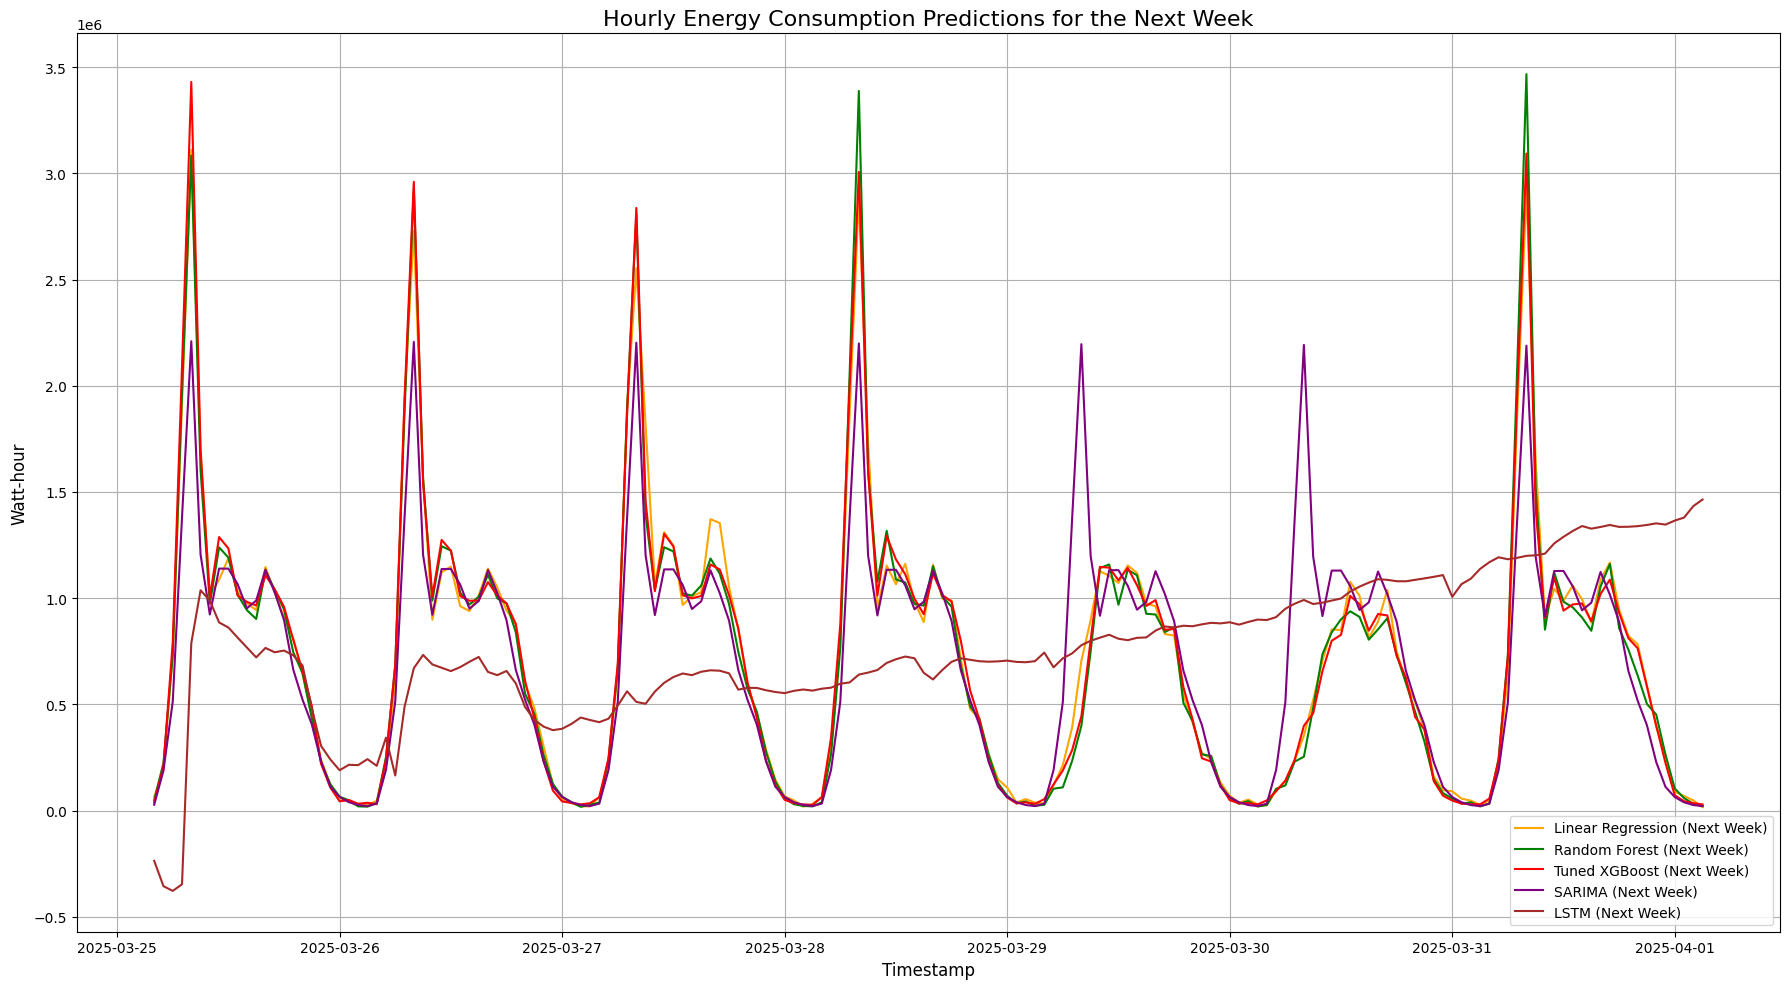

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

# Plot predictions for each model
plt.plot(future_lr_df.index, future_lr_df['predicted_consumption'], label='Linear Regression (Next Week)', color='orange', linestyle='-')
plt.plot(future_rf_df.index, future_rf_df['predicted_consumption'], label='Random Forest (Next Week)', color='green', linestyle='-')
plt.plot(future_xgb_df.index, future_xgb_df['predicted_consumption'], label='Tuned XGBoost (Next Week)', color='red', linestyle='-')
plt.plot(future_sarima_df.index, future_sarima_df['predicted_consumption'], label='SARIMA (Next Week)', color='purple', linestyle='-')
plt.plot(future_lstm_df.index, future_lstm_df['predicted_consumption'], label='LSTM (Next Week)', color='brown', linestyle='-')

plt.title('Hourly Energy Consumption Predictions for the Next Week', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Watt-hour', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

-0.5e6:

The "e6" part is scientific notation, specifically meaning "times 10 to the power of 6" (10 
6
 ), which is equal to 1,000,000 (one million).
Therefore, "-0.5e6" translates to "-0.5 * 1,000,000", which equals -500,000.
3.5e6:

Similarly, "3.5e6" means "3.5 * 10 to the power of 6", or "3.5 * 1,000,000", which equals 3,500,000.
In the context of the Y-axis (Watt-hour):

The y-axis of the plot ranges from -500,000 Watt-hours to 3,500,000 Watt-hours.

------
